In [1]:
import os
from torchvision.datasets import ImageFolder
from PIL import Image
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F
from sklearn.metrics import f1_score, accuracy_score
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
[i for i in os.listdir("data/Cats_lapkins")]

['Невская маскарадная кошка',
 'Оцикет',
 'Манчкин',
 'Чаузи',
 'Норвежская лесная кошка',
 'Тонкинская кошка',
 'Японский бобтейл',
 'Балинезийская кошка',
 'Селкирк-рекс',
 'Тойгер',
 'Канадский сфинкс',
 'Саванна (Ашера)',
 'Британская длинношерстная кошка',
 'Рагамаффин',
 'Петерболд',
 'Шотландская прямоухая кошка',
 'Шантильи-тиффани',
 'Сноу-шу',
 'Эльф',
 'Корат',
 'Немецкий рекс',
 'Пиксибоб',
 'Бенгальская кошка',
 'Мейн-кун',
 'Курильский бобтейл',
 'Мэнкс',
 'Рэгдолл',
 'Сибирская кошка',
 'Донской сфинкс',
 'Бирманская кошка',
 'Скукум',
 'Уральский рекс',
 'Бамбино',
 'Американский бобтейл',
 'Тайская кошка',
 'Сококе',
 'Персидская кошка',
 'Сиамская кошка',
 'Экзотическая кошка',
 'Египетская мау',
 'Шиншилла',
 'Сомалийская кошка',
 'Сингапурская кошка',
 'Русская голубая кошка',
 'Шотландская вислоухая кошка',
 'Шартрез',
 'Гималайская кошка',
 'Бурманская кошка',
 'Нибелунг',
 'Ориентальная кошка',
 'Европейская короткошерстная кошка',
 'Лаперм',
 'Турецкий ван',
 'А

In [4]:
import os
from torchvision.datasets import ImageFolder
from PIL import Image
from torch.utils.data import Dataset, DataLoader

class LoadCatsBreed(Dataset):
    def __init__(self, root_dir, transform=None):
        # self.train_dataset = ImageFolder(root="data/custom_dataset_monkey/training", transform=data_transform)
        # self.test_dataset = ImageFolder(root="data/custom_dataset_monkey/validation", transform=data_transform)
        
        self.root_dir = root_dir
        self.transform = transform
        self.classes = [i for i in os.listdir(root_dir)]
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.classes)}
        self.images = []
        for cls in self.classes:
            cls_path = os.path.join(self.root_dir, cls)
            for img_name in os.listdir(cls_path):
                img_path = os.path.join(cls_path, img_name)
                self.images.append((img_path, self.class_to_idx[cls]))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, target = self.images[idx]
        img = Image.open(img_path).convert("RGB")
        if self.transform is not None: 
            img = self.transform(img)
        return img, target

In [5]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [6]:
data_transform = transforms.Compose([
    # transforms.RandomResizedCrop(400),  # случайное обрезание и изменение размера до 224x224
      # случайное отражение по горизонтали
    transforms.Resize((128, 128)),
    # transforms.RandomHorizontalFlip(),
    # transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),  # изменение яркости, контраста, насыщенности и тона
    transforms.ToTensor(),  # преобразование изображения в тензор
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # нормализация средним и стандартным отклонением
])

In [7]:
dataset = LoadCatsBreed(root_dir="data/Cats_lapkins", transform=data_transform)

In [8]:
dataset.images

[('data/Cats_lapkins/Невская маскарадная кошка/Невская маскарадная кошка 31.jpg',
  0),
 ('data/Cats_lapkins/Невская маскарадная кошка/Невская маскарадная кошка 26.jpg',
  0),
 ('data/Cats_lapkins/Невская маскарадная кошка/Невская маскарадная кошка 28.jpg',
  0),
 ('data/Cats_lapkins/Невская маскарадная кошка/Невская маскарадная кошка 9.jpg',
  0),
 ('data/Cats_lapkins/Невская маскарадная кошка/Невская маскарадная кошка 33.jpg',
  0),
 ('data/Cats_lapkins/Невская маскарадная кошка/Невская маскарадная кошка 15.jpg',
  0),
 ('data/Cats_lapkins/Невская маскарадная кошка/Невская маскарадная кошка 14.jpg',
  0),
 ('data/Cats_lapkins/Невская маскарадная кошка/Невская маскарадная кошка 10.jpg',
  0),
 ('data/Cats_lapkins/Невская маскарадная кошка/Невская маскарадная кошка 42.jpg',
  0),
 ('data/Cats_lapkins/Невская маскарадная кошка/Невская маскарадная кошка 23.jpg',
  0),
 ('data/Cats_lapkins/Невская маскарадная кошка/Невская маскарадная кошка 1.jpg',
  0),
 ('data/Cats_lapkins/Невская маска

In [49]:
dataset.class_to_idx

{'Невская маскарадная кошка': 0,
 'Оцикет': 1,
 'Манчкин': 2,
 'Чаузи': 3,
 'Норвежская лесная кошка': 4,
 'Тонкинская кошка': 5,
 'Японский бобтейл': 6,
 'Балинезийская кошка': 7,
 'Селкирк-рекс': 8,
 'Тойгер': 9,
 'Канадский сфинкс': 10,
 'Саванна (Ашера)': 11,
 'Британская длинношерстная кошка': 12,
 'Рагамаффин': 13,
 'Петерболд': 14,
 'Шотландская прямоухая кошка': 15,
 'Шантильи-тиффани': 16,
 'Сноу-шу': 17,
 'Эльф': 18,
 'Корат': 19,
 'Немецкий рекс': 20,
 'Пиксибоб': 21,
 'Бенгальская кошка': 22,
 'Мейн-кун': 23,
 'Курильский бобтейл': 24,
 'Мэнкс': 25,
 'Рэгдолл': 26,
 'Сибирская кошка': 27,
 'Донской сфинкс': 28,
 'Бирманская кошка': 29,
 'Скукум': 30,
 'Уральский рекс': 31,
 'Бамбино': 32,
 'Американский бобтейл': 33,
 'Тайская кошка': 34,
 'Сококе': 35,
 'Персидская кошка': 36,
 'Сиамская кошка': 37,
 'Экзотическая кошка': 38,
 'Египетская мау': 39,
 'Шиншилла': 40,
 'Сомалийская кошка': 41,
 'Сингапурская кошка': 42,
 'Русская голубая кошка': 43,
 'Шотландская вислоухая ко

In [10]:
len(dataset)

2591

In [11]:
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split





# test_dataset = LoadMonkeys(root_dir="validation/validation", transform=data_transform)

batch_size = 16

val_ds_size = int(len(dataset) * 0.20)
train_ds_size = len(dataset) - val_ds_size
train_dataset, test_dataset = random_split(dataset, [train_ds_size, val_ds_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=8)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=8)


In [12]:
from torchvision.models import resnet18

model = resnet18(pretrained=True)

num_classes = len(dataset.classes)
in_features = model.fc.in_features
model.fc = torch.nn.Linear(in_features, num_classes)

print(model)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

/home/noble6/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/noble6/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [131]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

train_losses = []
test_losses = []

# import gc
# torch.cuda.empty_cache()
# gc.collect()
model.to(device)

CatBreedClassifier(
  (model): CatBreedModel(
    (conv1): Conv2d(3, 64, kernel_size=(10, 10), stride=(2, 2), padding=(1, 1))
    (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
    (norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (norm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (fc1): Linear(in_features=3136, out_features=256, bias=True)
    (norm1_1d): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc4): Linear(in_features=256, out_features=64, bias=True)
  )
)

In [132]:
for epoch in range(10):
    train_loss = 0.0
    test_loss = 0.0

    # Обучение на train_loader
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Валидация на val_loader
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item()

    train_losses.append(train_loss/len(train_loader))
    test_losses.append(test_loss/len(test_loader))

    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}')

torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
torch.Size([16, 64, 7, 7])
t

KeyboardInterrupt: 

In [160]:
from sklearn.metrics import classification_report
import pytorch_lightning as pl

In [147]:
class CatBreedModel(nn.Module):
    def __init__(self):
        super(CatBreedModel, self).__init__()
        # На вход изображение 3x128x128
        # Первый слой свертки, делаем 16 фильтров с размером ядра 10, падингом 1, шагом 2
        self.conv1 = nn.Conv2d(3, 16, kernel_size=10, padding=1, stride=2)
        # C - кол-во каналов, H, W - высота и ширина
        # F - размер свертки (просматриваемая область) - 5
        self.norm1 = nn.BatchNorm2d(16)
        # print(3 * ((400 - 7 + 2) // 3 + 1) * ((400 - 7 + 2) // 3 + 1))
        # 64 * 64 * 64
        self.conv2 = nn.Conv2d(16, 8, kernel_size=5, padding=1, stride=2)
        # 64 * 32 * 32
        self.norm2 = nn.BatchNorm2d(8)
        self.conv3 = nn.Conv2d(8, 8, kernel_size=3, padding=1, stride=2)
        # 64 * 16 * 16
        self.norm3 = nn.BatchNorm2d(8)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # 64 * 8 * 8
        
        # self.norm2 = nn.BatchNorm2d(64)
        
        self.fc1 = nn.Linear(8 * 7 * 7, 128)
        self.norm1_1d = nn.BatchNorm1d(128)
        self.fc4 = nn.Linear(128, 64)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(self.norm1(x))
        x = self.conv2(x)
        x = nn.functional.relu(self.norm2(x))
        x = self.conv3(x)
        x = nn.functional.relu(self.norm3(x))
        x = self.pool(x)
        # print(x.shape)
        x = x.view(-1, 8 * 7 * 7)
        x = nn.functional.relu(self.fc4(self.norm1_1d(self.fc1(x))))
        # x = nn.functional.relu(self.norm2_1d(self.fc2(x)))
        # x = nn.functional.relu(self.norm3_1d(self.fc3(x)))
        return nn.functional.log_softmax(x, dim=1)

# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# model = MonkeyModel().to(device)


In [148]:
class CatBreedClassifier(pl.LightningModule):
    def __init__(self, num_classes):
        super().__init__()
        # self.model = resnet18(pretrained=True)  # You can set pretrained=True to use pre-trained weights
        self.model = CatBreedModel()
        # in_features = self.model.fc.in_features
        # self.model.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = nn.CrossEntropyLoss()(outputs, targets)
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = nn.CrossEntropyLoss()(outputs, targets)
        self.log('val_loss', loss)
        return loss

    def test_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        loss = nn.CrossEntropyLoss()(outputs, targets)
        self.log('test_loss', loss)
        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == targets).sum().item() / targets.size(0)
        self.log('test_accuracy', accuracy, prog_bar=True)
        
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer




In [149]:
model = CatBreedClassifier(num_classes=num_classes)

In [150]:
trainer = pl.Trainer(max_epochs=12, accelerator="gpu")
trainer.fit(model, train_loader, test_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type          | Params
----------------------------------------
0 | model | CatBreedModel | 67.5 K
----------------------------------------
67.5 K    Trainable params
0         Non-trainable params
67.5 K    Total params
0.270     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [151]:
trainer.test(model, test_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │   0.023166023194789886    │
│         test_loss         │     4.748128414154053     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 4.748128414154053, 'test_accuracy': 0.023166023194789886}]

In [162]:
model(data_transform(img_cat).unsqueeze(0)).softmax(1).topk(5)                    

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 128])

In [103]:
indices = model(data_transform(img_cat).unsqueeze(0)).softmax(1).topk(5)

indices.indices

tensor([[50, 25, 61, 19,  5]])

In [105]:
for i in indices.indices[0]:
    for class_label, index in dataset.class_to_idx.items():
        if index == i:
            print(class_label, f"{indices.values[0][list(indices.indices[0]).index(i)].item():.4f}")

Европейская короткошерстная кошка 0.1150
Мэнкс 0.0907
Бурмилла 0.0700
Корат 0.0448
Тонкинская кошка 0.0447


In [46]:
dataset.class_to_idx

{'Невская маскарадная кошка': 0,
 'Оцикет': 1,
 'Манчкин': 2,
 'Чаузи': 3,
 'Норвежская лесная кошка': 4,
 'Тонкинская кошка': 5,
 'Японский бобтейл': 6,
 'Балинезийская кошка': 7,
 'Селкирк-рекс': 8,
 'Тойгер': 9,
 'Канадский сфинкс': 10,
 'Саванна (Ашера)': 11,
 'Британская длинношерстная кошка': 12,
 'Рагамаффин': 13,
 'Петерболд': 14,
 'Шотландская прямоухая кошка': 15,
 'Шантильи-тиффани': 16,
 'Сноу-шу': 17,
 'Эльф': 18,
 'Корат': 19,
 'Немецкий рекс': 20,
 'Пиксибоб': 21,
 'Бенгальская кошка': 22,
 'Мейн-кун': 23,
 'Курильский бобтейл': 24,
 'Мэнкс': 25,
 'Рэгдолл': 26,
 'Сибирская кошка': 27,
 'Донской сфинкс': 28,
 'Бирманская кошка': 29,
 'Скукум': 30,
 'Уральский рекс': 31,
 'Бамбино': 32,
 'Американский бобтейл': 33,
 'Тайская кошка': 34,
 'Сококе': 35,
 'Персидская кошка': 36,
 'Сиамская кошка': 37,
 'Экзотическая кошка': 38,
 'Египетская мау': 39,
 'Шиншилла': 40,
 'Сомалийская кошка': 41,
 'Сингапурская кошка': 42,
 'Русская голубая кошка': 43,
 'Шотландская вислоухая ко

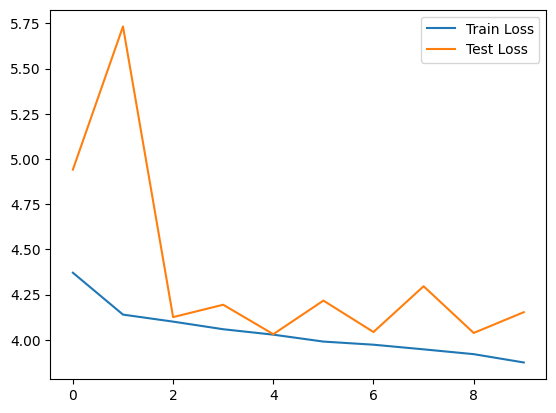

In [15]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [16]:
# Проверка на тестовом множестве
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for images, labels in test_loader:
        # print(images.shape, labels.shape)
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        
        
        # Выбираем класс с наибольшей вероятностью
        max_values, predicted = torch.max(outputs.data, 1)

        y_true.extend(labels.detach().cpu()) 
        y_pred.extend(predicted.detach().cpu())
        

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="macro")

    print(f'Test Accuracy: {acc}')
    print(f'Test F1 Score: {f1}')


Test Accuracy: 0.03861003861003861
Test F1 Score: 0.02387082951117328


In [26]:
from torchvision.models import resnet34

model = resnet18(pretrained=True)

print(model)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# model.to(device)

/home/noble6/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/noble6/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

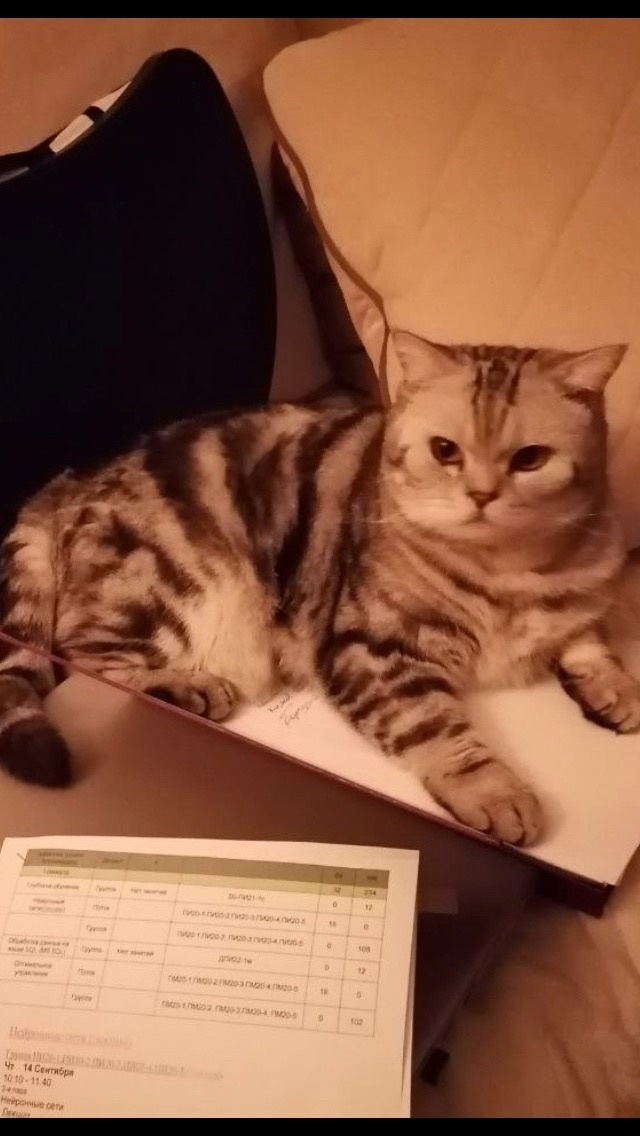

In [153]:
img_cat = Image.open("data/test_cat.jpg").convert("RGB")

img_cat

In [159]:
data_transform = transforms.Compose([
    # transforms.RandomResizedCrop(400),  # случайное обрезание и изменение размера до 224x224
      # случайное отражение по горизонтали
    transforms.Resize((128, 128)),
    # transforms.RandomHorizontalFlip(),
    # transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),  # изменение яркости, контраста, насыщенности и тона
    transforms.ToTensor(),  # преобразование изображения в тензор
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # нормализация средним и стандартным отклонением
])


data_transform(img_cat)

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0706, 0.0706, 0.0706,  ..., 0.0706, 0.0706, 0.0706],
         [0.5333, 0.5255, 0.5216,  ..., 0.5176, 0.5137, 0.5137],
         ...,
         [0.7137, 0.6588, 0.6667,  ..., 0.3843, 0.3765, 0.3608],
         [0.0941, 0.0902, 0.0902,  ..., 0.0549, 0.0510, 0.0471],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0392, 0.0392, 0.0392,  ..., 0.0392, 0.0353, 0.0353],
         [0.2980, 0.2941, 0.2902,  ..., 0.2824, 0.2824, 0.2784],
         ...,
         [0.5451, 0.4941, 0.4980,  ..., 0.1843, 0.1804, 0.1765],
         [0.0745, 0.0667, 0.0667,  ..., 0.0275, 0.0235, 0.0235],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0275, 0.0275, 0.0275,  ..., 0.0235, 0.0235, 0.0235],
         [0.1843, 0.1804, 0.1843,  ..., 0.1608, 0.1608, 0.

In [158]:
model(data_transform(img_cat).unsqueeze(0)).softmax(1).topk(5)

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 128])

In [ ]:
model.fea